Reference material:
- https://dxli94.github.io/BLIP-Diffusion-website/
- https://huggingface.co/salesforce/blipdiffusion

In [1]:
!pip install -qU diffusers transformers accelerate ftfy controlnet_aux torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.6/274.6 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 7.2 MB/s eta 0:00:00


In [2]:
from diffusers.pipelines import BlipDiffusionControlNetPipeline
from diffusers.utils import load_image
from controlnet_aux import CannyDetector
import torch
import datetime
import re
from google.colab import files

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


In [3]:
blip_diffusion_pipe = BlipDiffusionControlNetPipeline.from_pretrained(
    "Salesforce/blipdiffusion-controlnet", torch_dtype=torch.float16
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/419 [00:00<?, ?B/s]

controlnet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

qformer/config.json:   0%|          | 0.00/708 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/628 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/8 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [4]:
class Img():
    def __init__(self, filename, descr):
        self.filename = filename

        self.descr = descr
        self.descr_no_ws = re.sub(r'\s+', '', self.descr)

In [5]:
class StyleSubjects():
    def __init__(self, text, url):
        self.text = text
        self.url = url

In [6]:
style_subjects = [
    StyleSubjects("fire", "https://dxli94.github.io/BLIP-Diffusion-website/data/images-in-paper/demo2/condition/fire.jpg"),
    StyleSubjects("flower", "https://dxli94.github.io/BLIP-Diffusion-website/data/images-in-paper/demo2/condition/flower.jpg"),
    StyleSubjects("vase", "https://dxli94.github.io/BLIP-Diffusion-website/data/images-in-paper/demo2/condition/vase.jpg"),
    StyleSubjects("yarn", "https://dxli94.github.io/BLIP-Diffusion-website/data/images-in-paper/demo2/condition/yarn.jpg")
]

In [7]:
text_prompt = "" # Not clear on what this does, works w/o it

guidance_scale = 7.5
num_inference_steps = 50
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

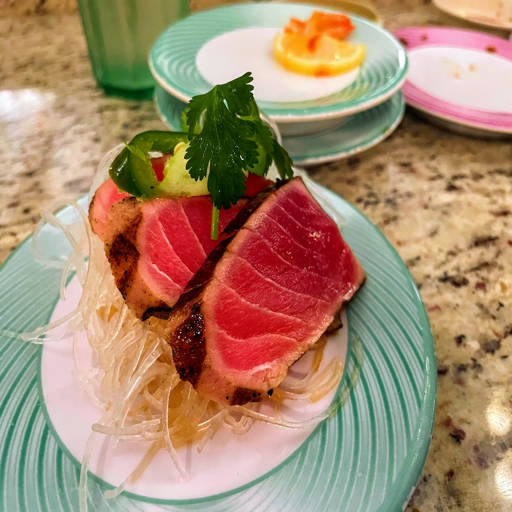

In [8]:
img = Img('tuna_sashimi.jpeg', 'Tuna sashimi')

cldm_cond_image = load_image(
    img.filename
).resize((512, 512))
cldm_cond_image

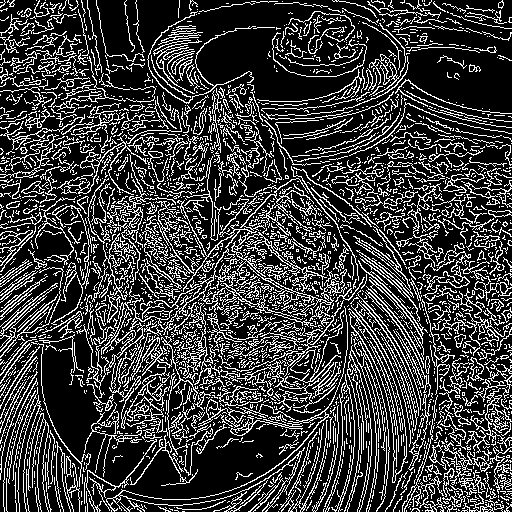

In [9]:
canny = CannyDetector()
cldm_cond_image = canny(cldm_cond_image, 30, 70, output_type="pil")
cldm_cond_image

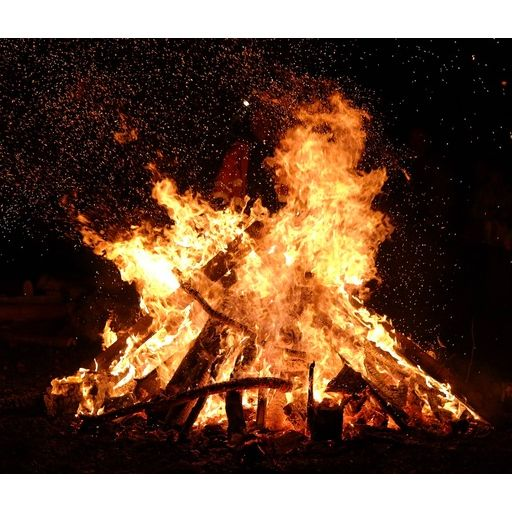

  0%|          | 0/51 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

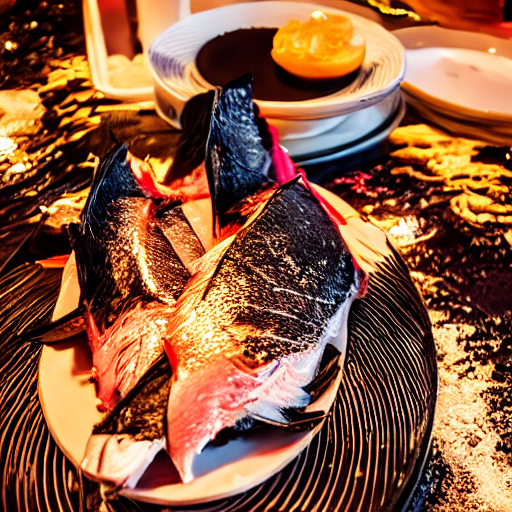

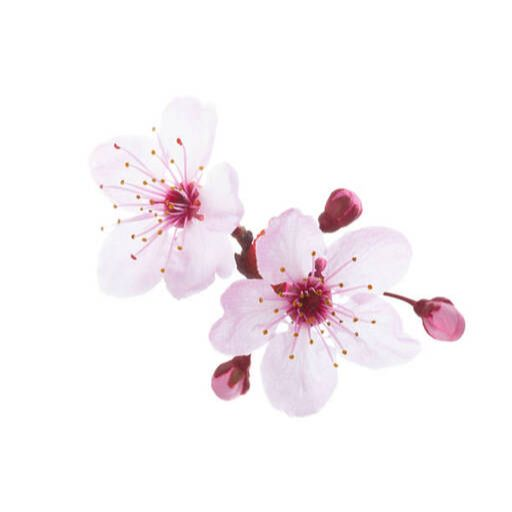

  0%|          | 0/51 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

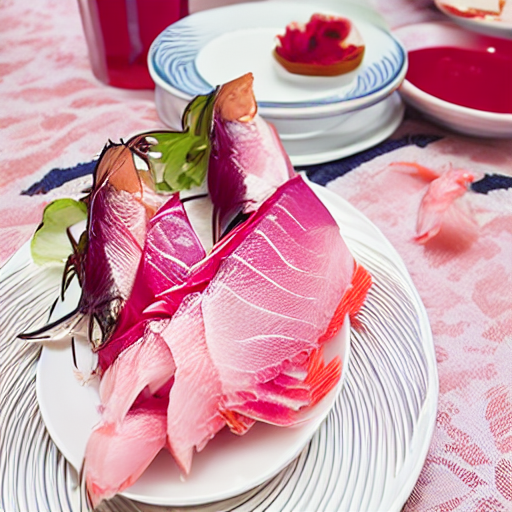

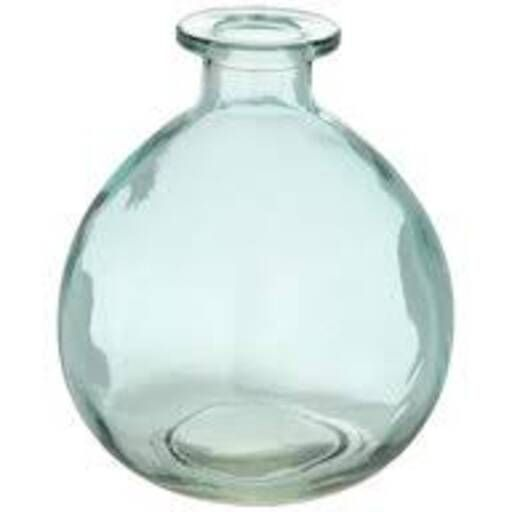

  0%|          | 0/51 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

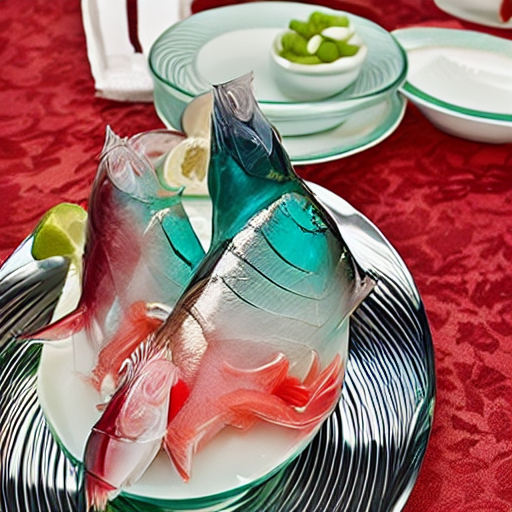

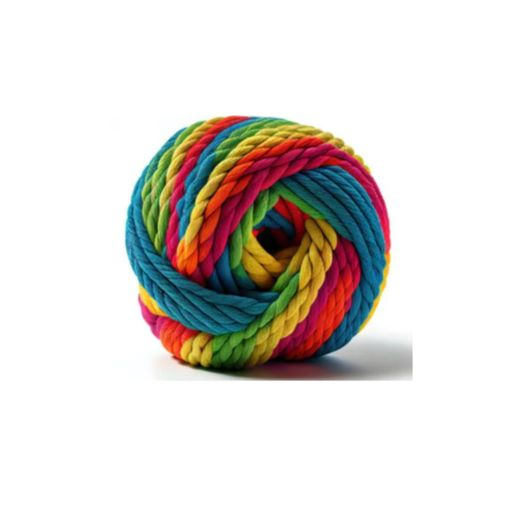

  0%|          | 0/51 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

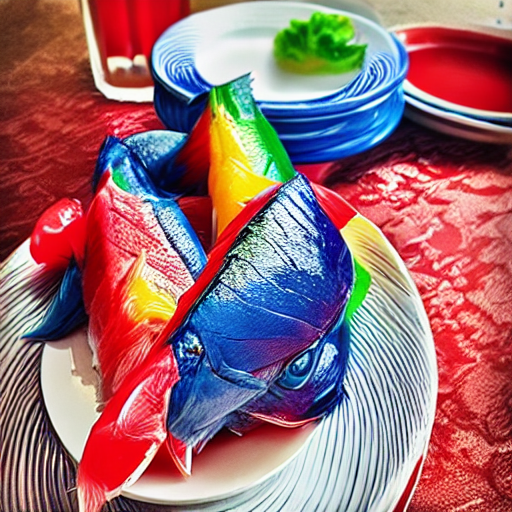

In [10]:
for i in range(4):
  # Load the style
  style_image = load_image(
      style_subjects[i].url
  )
  display(style_image)

  # It's diffusing time!
  output = blip_diffusion_pipe(
      text_prompt,
      style_image,
      cldm_cond_image,
      style_subjects[i].text,
      img.descr,
      guidance_scale=guidance_scale,
      num_inference_steps=num_inference_steps,
      neg_prompt=negative_prompt,
      height=512,
      width=512,
  ).images

  # Save to disk
  epoch_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
  fn = f"output_{img.descr_no_ws}_{style_subjects[i].text}_{epoch_time}.png"
  output[0].save(fn)
  files.download(fn)

  # Display the image
  display(output[0])